## Insurance Claim Fraud Detection-<br>
__Project Description__
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

Independent Variables
1.	__months_as_customer__: Number of months of patronage
2.	__age__: the length of time a customer has lived or a thing has existed
3.	__policy_number__: It is a unique id given to the customer, to track the subscription status and other details of customer
4.	__policy_bind_date__:date which document that is given to customer after we accept your proposal for insurance
5.	__policy_state__: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period
6.	__policy_csl__: is basically Combined Single Limit
7.	__policy_deductable__: the amount of money that a customer is responsible for paying toward an insured loss
8.	__policy_annual_premium__: This means the amount of Regular Premium payable by the Policyholder in a Policy Year
9.	__umbrella_limit__: This means extra insurance that provides protection beyond existing limits and coverages of other policies
10.	__insured_zip__: It is the zip code where the insurance was made
11.	__insured_sex__: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions
12.	__insured_education_level__: This refers to the Level of education of the customer
13.	__insured_occupation__: This refers Occupation of the customer
14.	__insured_hobbies__: This refers to an activity done regularly by customer in his/her leisure time for pleasure.
15.	__insured_relationship__: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership
16.	__capital-gains__: This refers to profit accrued due to insurance premium
17.	__capital-loss_: This refers to the losses incurred due to insurance claims
18.	__incident_date__: This refers to the date which claims where made by customers
19.	__incident_type__: This refers to the type of claim/vehicle damage made by customer
20.	__collision_type__: This refers to the area of damage on the vehicle
21.	__incident_severity__: This refers to the extent/level of damage
22.	__authorities_contacted__: This refers to the government agencies that were contacted after damage
23.	__incident_state__: This refers to the state at which the accident happened
24.	__incident_city__: This refers to the city at which the accident happened
25.	__1ncident_location__: This refers to the location at which the accident happened
26.	__incident_hour_of_the_day__: The period of the day which accident took place
27.	__number_of_vehicles_involved__: This refers to number of vehicles involved the accident
28.	__property_damage__: This refers to whether property was damaged or not
29.	__bodily_injuries__: This refers to injuries sustained
30.	__witnesses__: This refers to the number of witnesses involved
31.	__police_report_available__: This refers to whether the report on damage was documented or not
32.	__total_claim_amount__: This refers to the financial implications involved in claims
33.	__injury_claim__: This refers to physical injuries sustained
34.	__property_claim__: This refers to property damages during incident
35.	__vehicle_claim__: This refers to property damages during incident
36.	__auto_make__: This refers to the make of the vehicle
37.	__auto_model__: This refers to the model of the vehicle
38.	__auto_year__: This refers to the year which the vehicle was manufactured
39.	__c39__:
40.	__fraud_reported__


In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Automobile_insurance_fraud.csv')

In [3]:
#Reading top 5 rows
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
#bottom  5 rows
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


## Exploratory Data Analysis(EDA)

In [5]:
print("The shape of the dataset",df.shape)
df.drop_duplicates(inplace=True)
print("\nAfter srooping  duplicates",df.shape)

The shape of the dataset (1000, 40)

After srooping  duplicates (1000, 40)


With the drop_duplicates option I was trying to get rid of all the duplicate values present in our dataset. However, we can see that there are no duplicate data present in our dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Using the info method we can see that there is 2 column with float data type, 17 columns with integer data type and 21 columns that have object data type. We will try to spearate these columns into numeric and object datatypes for easier analysis.<br>
Also the objectdatatype of 'policy_bind_date' and 'incident_date ' column so we need to converts its datatype from object to date type

In [7]:
#deriving required columns and drop the original column
df['policy_year']=pd.to_datetime(df['policy_bind_date']).dt.year

df['policy_day']=pd.to_datetime(df['policy_bind_date']).dt.day

df['policy_month']=pd.to_datetime(df['policy_bind_date']).dt.month

#dropping the column 
df.drop('policy_bind_date',axis=1,inplace=True)

In [8]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                   0
bodily_injuries             

- column _c39  has all the null values that means we can drop this column without any hesitataion.

In [9]:
df.nunique().to_frame("Unique Values")


,Unique Values
months_as_customer,391
age,46
policy_number,1000
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995
insured_sex,2


Using the nunique method we are able to list down all the unique values present in our dataset columns. I do not see any column with one single unique value either so that is good. However there are 2 columns which have all the 1000 rows filled with unique data that will need to be removed as it won't help in our label prediction anyway.

In [10]:
df=df.drop('_c39',axis=1)

 I am dropping the "policy_number" and "incident_location" columns since I feel it is pretty much useless showing just a list of unique identifiers on each row without adding much insight into the prediction of our target label

In [11]:
df=df.drop(["policy_number", "incident_location"], axis=1)


In [12]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'policy_year',
       'policy_day', 'policy_month'],
      dtype='object')

In [13]:
numeric_cols =df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes('object').columns.tolist()
print(f"Object Data Type Columns are:\n ",categorical_cols)
print(f"Number Data Type Columns are:\n ",numeric_cols)



Object Data Type Columns are:
  ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']
Number Data Type Columns are:
  ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', 'policy_year', 'policy_day', 'policy_month']


We have successfully bifurcated the object datatype column names and numeric data type column names. Since we do not have to worry about outliers and skewness in categorical columns we can use this separated column names to pre process data only on numerical continous columns.

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00
number_of_vehicles_involved,1000.0,1.839000e+00,1.018880e+00,1.00,1.0000,1.0,3.000,4.00


Using the describe method to check the numerical data details. There are 17 columns which have numerical values in them and it looks like the count, mean, standard deviation, minimum value, 25% quartile, 50% quartile, 75% quartile and maximum value are all mostly properly distributed in terms of data points but I do see some abnormality that we will confirm with a visual on it.



__Exploring every column of the dataset__

In [15]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'policy_year',
       'policy_day', 'policy_month'],
      dtype='object')

In [16]:
def check(column):
    t=df[column].dtype
    if t=='object':
        sns.countplot(df[column],hue=df['fraud_reported'])
        print(f'unique values in {column} is:',df[column].nunique())
        print(f'unique values in {column} is:',df[column].value_counts())
    else:
        print(f'Brief of {column}:',df[column].describe())
        sns.boxplot(df[column],orient='v')
        print('\nskewness:',df[column].skew())
        print(f'unique values count in {column}:',df[column].nunique())
    return

I have defined a function here so that I can plot countplot  or boxplot depending upon the type of the column by just calling the function.

Brief of months_as_customer: count    1000.000000
mean      203.954000
std       115.113174
min         0.000000
25%       115.750000
50%       199.500000
75%       276.250000
max       479.000000
Name: months_as_customer, dtype: float64

skewness: 0.3621768477780205
unique values count in months_as_customer: 391


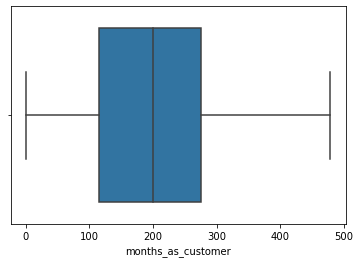

In [17]:
check('months_as_customer')

we can see in average customer is from 204 months and least of 0 months. 75% customers are less than 276 months there are no outliers,also skewness is in range.

Brief of age: count    1000.000000
mean       38.948000
std         9.140287
min        19.000000
25%        32.000000
50%        38.000000
75%        44.000000
max        64.000000
Name: age, dtype: float64

skewness: 0.47898804709224163
unique values count in age: 46


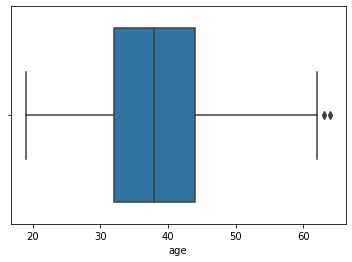

In [18]:
check('age')


Skewness is acceptable. Min age of client is 19 years, max age is 64. few outliers are present, 50% of the clients are less than age of 38

unique values in policy_state is: 3
unique values in policy_state is: OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


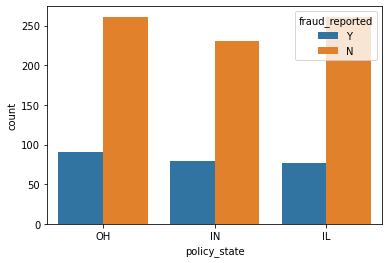

In [19]:
check('policy_state')

for policy state Ohio has a larger chunk of data as compared to Illinois and Indiana but all 3 have pretty much similar data points

unique values in policy_csl is: 3
unique values in policy_csl is: 250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


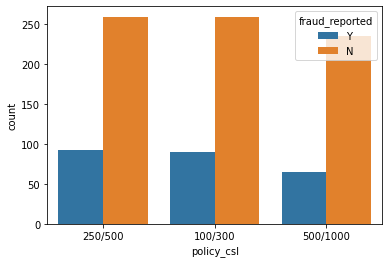

In [20]:
check('policy_csl')

in the policy sections again we see that 250/500 category has a slighty higher data coverage than the 100-300 and 500/1000 categories

Brief of policy_deductable: count    1000.000000
mean     1136.000000
std       611.864673
min       500.000000
25%       500.000000
50%      1000.000000
75%      2000.000000
max      2000.000000
Name: policy_deductable, dtype: float64

skewness: 0.4778872137362794
unique values count in policy_deductable: 3


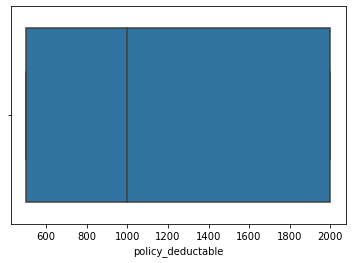

In [21]:
check('policy_deductable')


the policy deductables amount 500 - 1000 -2000 avg amount of 1136 is deducted.



Brief of policy_annual_premium: count    1000.000000
mean     1256.406150
std       244.167395
min       433.330000
25%      1089.607500
50%      1257.200000
75%      1415.695000
max      2047.590000
Name: policy_annual_premium, dtype: float64

skewness: 0.004401994526610823
unique values count in policy_annual_premium: 991


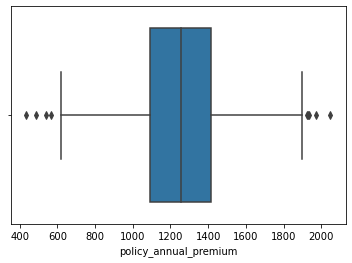

In [22]:
check('policy_annual_premium')


there are some outliers in the premium amount. It is normally distributed.Max. premium amount is 2048



Brief of umbrella_limit: count    1.000000e+03
mean     1.101000e+06
std      2.297407e+06
min     -1.000000e+06
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+07
Name: umbrella_limit, dtype: float64

skewness: 1.806712198714504
unique values count in umbrella_limit: 11


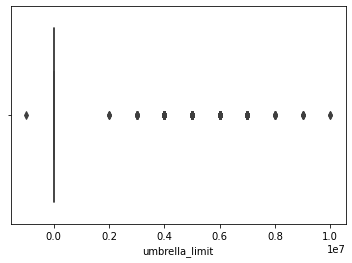

In [23]:
check('umbrella_limit')


skewness is more, outliers are present,


<AxesSubplot:xlabel='umbrella_limit', ylabel='count'>

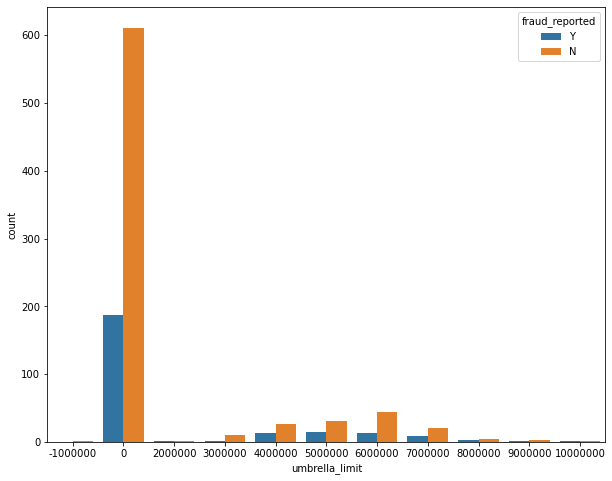

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(df['umbrella_limit'],hue=df['fraud_reported'])

we see that the umbrella limit is the highest for the number 0 than any other value listed in that column

Brief of insured_zip: count      1000.000000
mean     501214.488000
std       71701.610941
min      430104.000000
25%      448404.500000
50%      466445.500000
75%      603251.000000
max      620962.000000
Name: insured_zip, dtype: float64

skewness: 0.8165539258839357
unique values count in insured_zip: 995


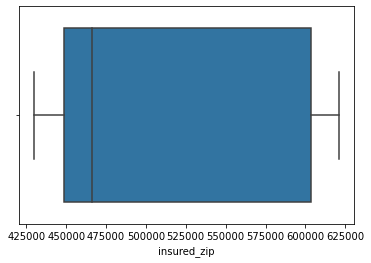

In [25]:
check('insured_zip')


this is the zip code of location . we doesnt need this column.



In [26]:
df=df.drop('insured_zip',axis=1)

unique values in insured_sex is: 2
unique values in insured_sex is: FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


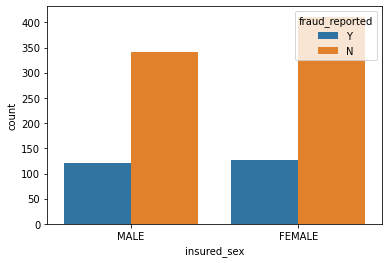

In [27]:
check('insured_sex')


we can see that almost both male and female have insurance but the data coverage for female is a bit higher than their male couterparts


unique values in insured_education_level is: 7
unique values in insured_education_level is: JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


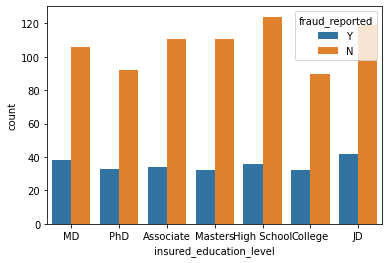

In [28]:
check('insured_education_level')


The count of fraud is almost equal in every category 

unique values in insured_occupation is: 14
unique values in insured_occupation is: machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


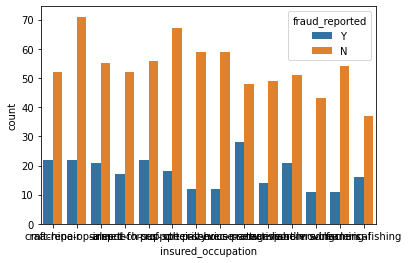

In [29]:
check('insured_occupation')


Maximum fraud reported from executive and managerial roles

unique values in insured_hobbies is: 20
unique values in insured_hobbies is: reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


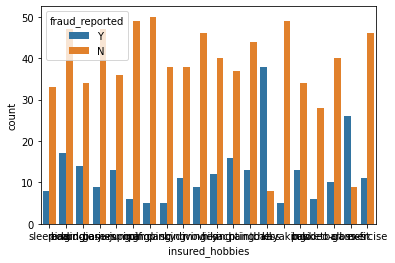

In [30]:
check('insured_hobbies')


<AxesSubplot:xlabel='count', ylabel='insured_hobbies'>

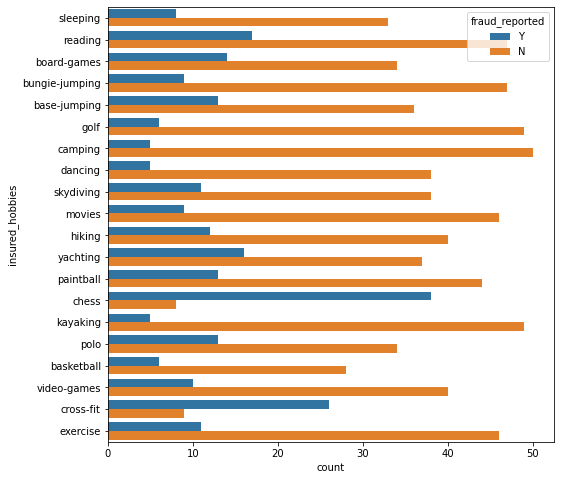

In [31]:
plt.figure(figsize=(8,8))
sns.countplot(y=df['insured_hobbies'],hue=df['fraud_reported'])

people with hobby like playing chessare more prone to be fraud claim as per this countplot

unique values in insured_relationship is: 6
unique values in insured_relationship is: own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


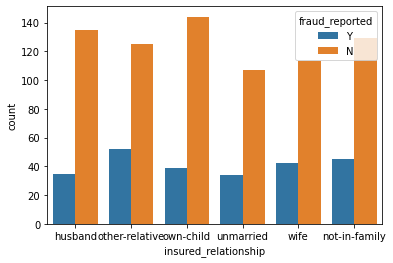

In [32]:
check('insured_relationship')


other relation people tend to claim more frauds.



Brief of capital-gains: count      1000.000000
mean      25126.100000
std       27872.187708
min           0.000000
25%           0.000000
50%           0.000000
75%       51025.000000
max      100500.000000
Name: capital-gains, dtype: float64

skewness: 0.4788502295807907
unique values count in capital-gains: 338


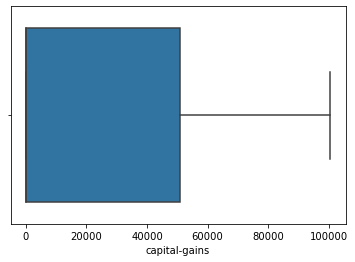

In [33]:
check('capital-gains')


acceptable skewness,no outliers, max. gain of 100500 and min of 0



Brief of capital-loss: count      1000.000000
mean     -26793.700000
std       28104.096686
min     -111100.000000
25%      -51500.000000
50%      -23250.000000
75%           0.000000
max           0.000000
Name: capital-loss, dtype: float64

skewness: -0.39147194299389343
unique values count in capital-loss: 354


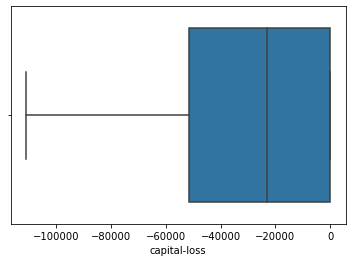

In [34]:
check('capital-loss')


loss itself tends -ve, the values in the column are in negative,let us make them possitive




In [35]:
df['capital-loss']=abs(df['capital-loss'])


Brief of capital-loss: count      1000.000000
mean      26793.700000
std       28104.096686
min           0.000000
25%           0.000000
50%       23250.000000
75%       51500.000000
max      111100.000000
Name: capital-loss, dtype: float64

skewness: 0.39147194299389343
unique values count in capital-loss: 354


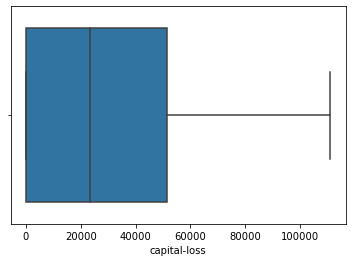

In [36]:
check('capital-loss')


there is a mean loss of 26793 and max loss of 111100



unique values in incident_date is: 60
unique values in incident_date is: 02-02-2015    28
17-02-2015    26
07-01-2015    25
10-01-2015    24
04-02-2015    24
24-01-2015    24
19-01-2015    23
08-01-2015    22
13-01-2015    21
30-01-2015    21
12-02-2015    20
22-02-2015    20
31-01-2015    20
06-02-2015    20
21-02-2015    19
01-01-2015    19
23-02-2015    19
12-01-2015    19
14-01-2015    19
21-01-2015    19
03-01-2015    18
14-02-2015    18
01-02-2015    18
28-02-2015    18
20-01-2015    18
18-01-2015    18
25-02-2015    18
06-01-2015    17
09-01-2015    17
08-02-2015    17
24-02-2015    17
26-02-2015    17
13-02-2015    16
15-02-2015    16
16-02-2015    16
05-02-2015    16
16-01-2015    16
17-01-2015    15
18-02-2015    15
28-01-2015    15
15-01-2015    15
22-01-2015    14
20-02-2015    14
27-02-2015    14
23-01-2015    13
03-02-2015    13
27-01-2015    13
09-02-2015    13
04-01-2015    12
01-03-2015    12
26-01-2015    11
29-01-2015    11
02-01-2015    11
19-02-2015    10
11-02-201

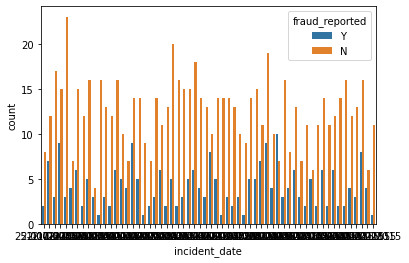

In [37]:
check('incident_date')


majority incidents occured in 2015. this doesn't play any role and also only one year.. so we can drop this column



In [38]:
df.drop('incident_date',axis=1,inplace=True)


unique values in incident_type is: 4
unique values in incident_type is: Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


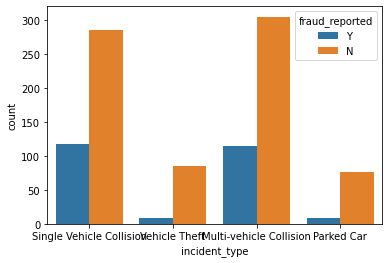

In [39]:
check('incident_type')


Majority of single vehicle collision claims are fraudulent



unique values in collision_type is: 4
unique values in collision_type is: Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64


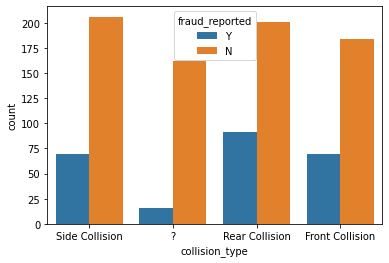

In [40]:
check('collision_type')


there is a ? in the values, all the collisions are covered,might be not entered .so let us fill that with mode .. i.e rear collision



In [41]:
df['collision_type'].replace('?','Rear Collision',inplace=True)


unique values in collision_type is: 3
unique values in collision_type is: Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64


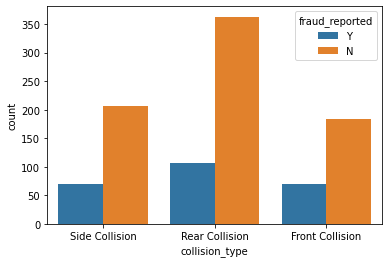

In [42]:
check('collision_type')


we can see majority of fraud claims are rear collisions



unique values in incident_severity is: 4
unique values in incident_severity is: Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


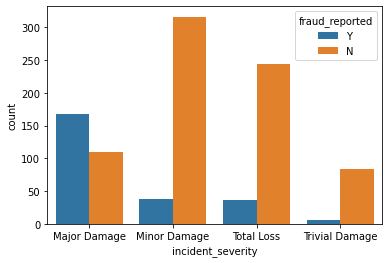

In [43]:
check('incident_severity')


major damage claims are fraudulent



unique values in authorities_contacted is: 5
unique values in authorities_contacted is: Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


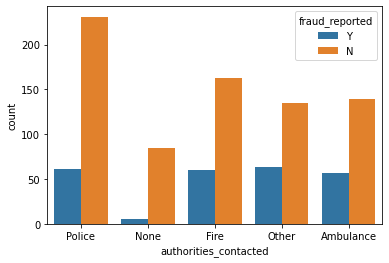

In [44]:
check('authorities_contacted')


contacted other authorities tends to be more fraudulent,



unique values in incident_state is: 7
unique values in incident_state is: NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


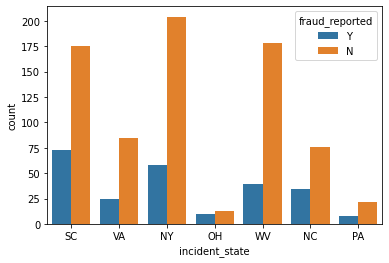

In [45]:
check('incident_state')


incidents happended in state SC,PH and OH are more fraud claims



unique values in incident_city is: 7
unique values in incident_city is: Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


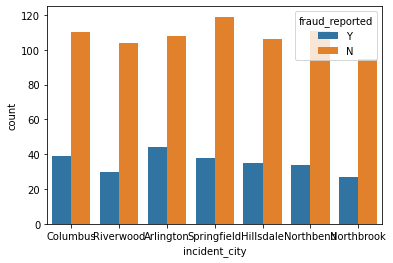

In [46]:
check('incident_city')


we already had state detail of incident, so this column might get multicolinearity issue



Brief of incident_hour_of_the_day: count    1000.000000
mean       11.644000
std         6.951373
min         0.000000
25%         6.000000
50%        12.000000
75%        17.000000
max        23.000000
Name: incident_hour_of_the_day, dtype: float64

skewness: -0.03558446643823673
unique values count in incident_hour_of_the_day: 24


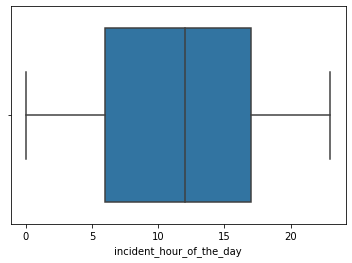

In [47]:
check('incident_hour_of_the_day')


we can see 50% of the incidents occured during day less than 12pm



<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='count'>

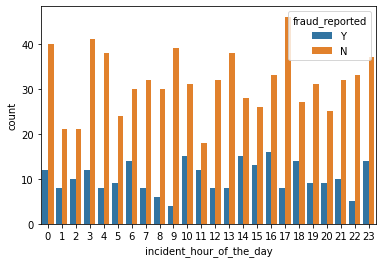

In [48]:
sns.countplot(df['incident_hour_of_the_day'],hue=df['fraud_reported'])


incidents reported at night times 23, 0 and 10am. 14 and 16 hours are tend to be more fraudulent claims



Brief of number_of_vehicles_involved: count    1000.00000
mean        1.83900
std         1.01888
min         1.00000
25%         1.00000
50%         1.00000
75%         3.00000
max         4.00000
Name: number_of_vehicles_involved, dtype: float64

skewness: 0.502664087487584
unique values count in number_of_vehicles_involved: 4


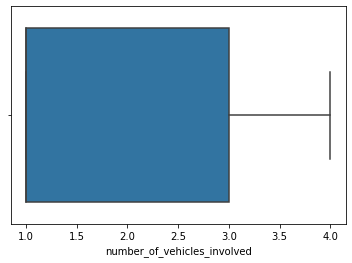

In [49]:
check('number_of_vehicles_involved')


there are 4 vehicles involved max.



<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

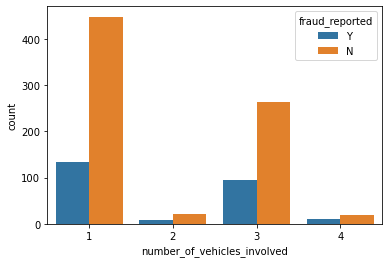

In [50]:
sns.countplot(df['number_of_vehicles_involved'],hue=df['fraud_reported'])


comparitively 1 , 2 vehicles crash involved are more fraud claims



unique values in property_damage is: 3
unique values in property_damage is: ?      360
NO     338
YES    302
Name: property_damage, dtype: int64


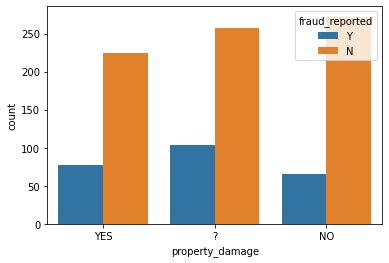

In [51]:
check('property_damage')


? has the more fraudulent climes, i.e it must be having property damage in report.So replace the ? with Yes



In [52]:
df['property_damage']=df['property_damage'].replace('?','YES')


unique values in property_damage is: 2
unique values in property_damage is: YES    662
NO     338
Name: property_damage, dtype: int64


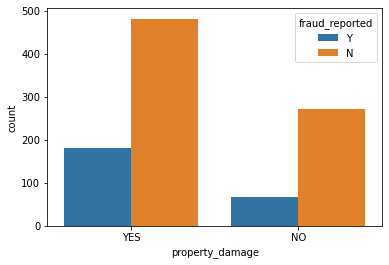

In [53]:
check('property_damage')


Brief of bodily_injuries: count    1000.000000
mean        0.992000
std         0.820127
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: bodily_injuries, dtype: float64

skewness: 0.014777103511243209
unique values count in bodily_injuries: 3


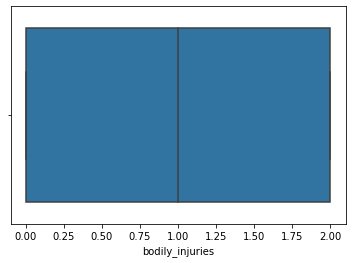

In [54]:
check('bodily_injuries')


<AxesSubplot:xlabel='bodily_injuries', ylabel='count'>

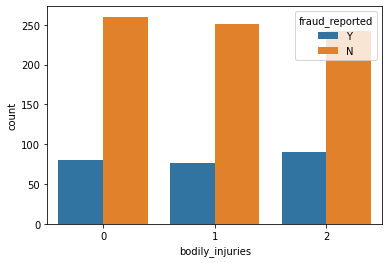

In [55]:
sns.countplot(df['bodily_injuries'],hue=df['fraud_reported'])


in terms of bodily injueries the severity for level 2 is slightly higher than the level 0 and 1


Brief of witnesses: count    1000.000000
mean        1.487000
std         1.111335
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: witnesses, dtype: float64

skewness: 0.019636419856529662
unique values count in witnesses: 4


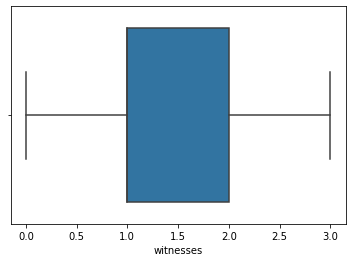

In [56]:
check('witnesses')


<AxesSubplot:xlabel='witnesses', ylabel='count'>

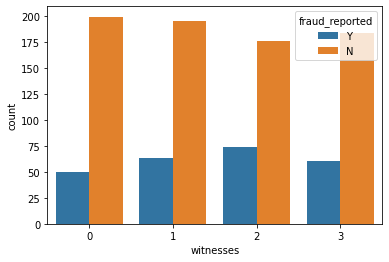

In [57]:
sns.countplot(df['witnesses'],hue=df['fraud_reported'])


with 2 witness are more fraudulent



unique values in police_report_available is: 3
unique values in police_report_available is: ?      343
NO     343
YES    314
Name: police_report_available, dtype: int64


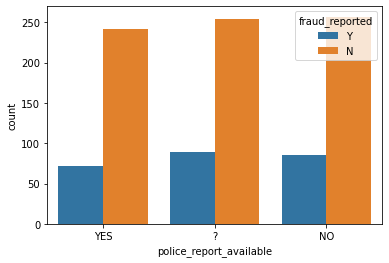

In [58]:
check('police_report_available')


more fraud will be with no police reports, we will fill the ? with NO


In [59]:
df['police_report_available'].replace('?','NO',inplace=True)



unique values in police_report_available is: 2
unique values in police_report_available is: NO     686
YES    314
Name: police_report_available, dtype: int64


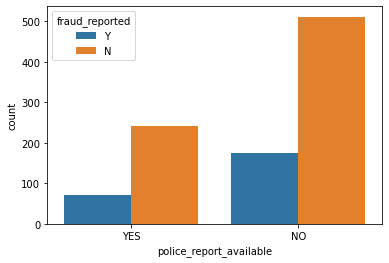

In [60]:
check('police_report_available')


Brief of total_claim_amount: count      1000.00000
mean      52761.94000
std       26401.53319
min         100.00000
25%       41812.50000
50%       58055.00000
75%       70592.50000
max      114920.00000
Name: total_claim_amount, dtype: float64

skewness: -0.594581988510234
unique values count in total_claim_amount: 763


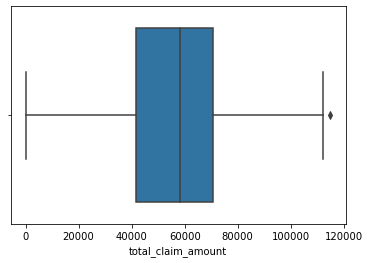

In [61]:
check('total_claim_amount')


max claim amount is 114920



unique values in auto_make is: 14
unique values in auto_make is: Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


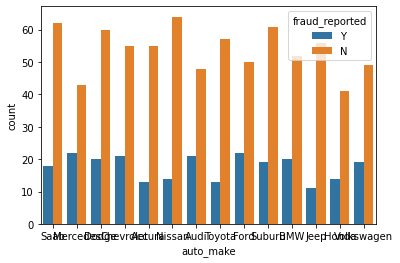

In [62]:
check('auto_make')


There are different types of cars insured.Frauds are dependent on mentality of person not wrt to car. so we can drop this column



In [63]:
df.drop('auto_make',axis=1,inplace=True)


unique values in auto_model is: 39
unique values in auto_model is: RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64


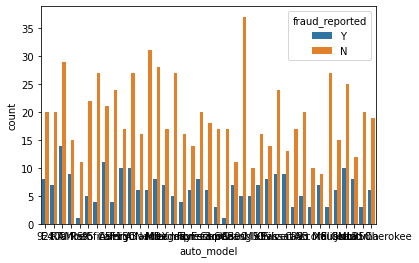

In [64]:
check('auto_model')


lly we can drop this column also



In [65]:
df.drop(['auto_model','auto_year'],axis=1,inplace=True)


<AxesSubplot:xlabel='count', ylabel='policy_year'>

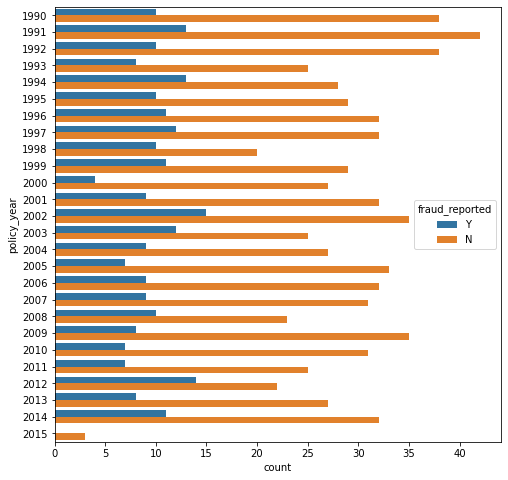

In [66]:
plt.figure(figsize=(8,8))
sns.countplot(y=df['policy_year'],hue=df['fraud_reported'])

Based on the number of years of policy also there is a little let us calculate years, in that column from 2015

chance of predicting fraudulent,



In [67]:
df['policy_year']=2015-df['policy_year']


In [68]:
## Dropping policy_day, policy_month as we have already year column which s sufficient
df.drop(['policy_day','policy_month'],axis=1,inplace=True)


In [69]:
#dropping 'policy_csl' column as well as it has no impact on target label
df.drop('policy_csl',axis=1,inplace=True)


unique values in fraud_reported is: 2
unique values in fraud_reported is: N    753
Y    247
Name: fraud_reported, dtype: int64


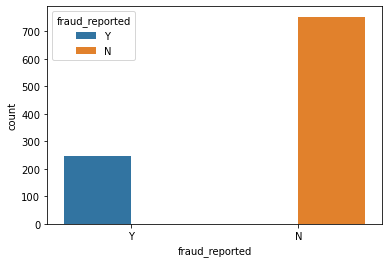

In [70]:
check('fraud_reported')


__This is our target label,which is a case of class imbalance so we need to handle this imbalane later in the project__

In [71]:
#aagain checking how many columns we are left with
df.shape

(1000, 31)

__Here we reached 31 columns, lets write down which columns we deleted so far__<br>

1. policy_bind_date

2. _c39

3. policy_number

4. incident_location

5. insured_zip

6. incident_date

7. auto_make

8. auto_model

9. auto_year

10. policy_csl

11. policy_month

12. policy_date


Here we can observe some skewness in few columns , also while exploring the column we found some skewness so lets check skewness

In [72]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                   0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
policy_year                   -0.052511
dtype: float64

## Encoding the categorical object datatype columns

In [73]:
from sklearn.preprocessing import LabelEncoder


In [74]:
le=LabelEncoder()


In [75]:
cols=df.select_dtypes(include='object').columns
for i in cols:
    df[i]=le.fit_transform(df[i])
df

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,policy_year
0,328,48,2,1000,1406.91,0,1,4,2,17,...,1,1,2,1,71610,6510,13020,52080,1,1
1,228,42,1,2000,1197.22,5000000,1,4,6,15,...,1,0,0,0,5070,780,780,3510,1,9
2,134,29,2,2000,1413.14,5000000,0,6,11,2,...,0,2,3,0,34650,7700,3850,23100,0,15
3,256,41,0,2000,1415.74,6000000,0,6,1,2,...,1,1,2,0,63400,6340,6340,50720,1,25
4,228,44,0,1000,1583.91,6000000,1,0,11,2,...,0,0,1,0,6500,1300,650,4550,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,1000,1310.80,0,0,5,2,13,...,1,0,1,0,87200,17440,8720,61040,0,24
996,285,41,0,1000,1436.79,0,0,6,9,17,...,1,2,3,0,108480,18080,18080,72320,0,1
997,130,34,2,500,1383.49,3000000,0,5,1,3,...,1,2,3,1,67500,7500,7500,52500,0,12
998,458,62,0,2000,1356.92,5000000,1,0,5,0,...,1,0,1,1,46980,5220,5220,36540,0,4


Chekcing for nul after applying Encodinf technique o dataset

In [76]:
df.isna().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
fraud_reported                 0
policy_yea

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   int32  
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   int32  
 7   insured_education_level      1000 non-null   int32  
 8   insured_occupation           1000 non-null   int32  
 9   insured_hobbies              1000 non-null   int32  
 10  insured_relationship         1000 non-null   int32  
 11  capital-gains                1000 non-null   int64  
 12  capital-loss                 1000 non-null   int64  
 13  incident_type      

__Now, lets check skewness__

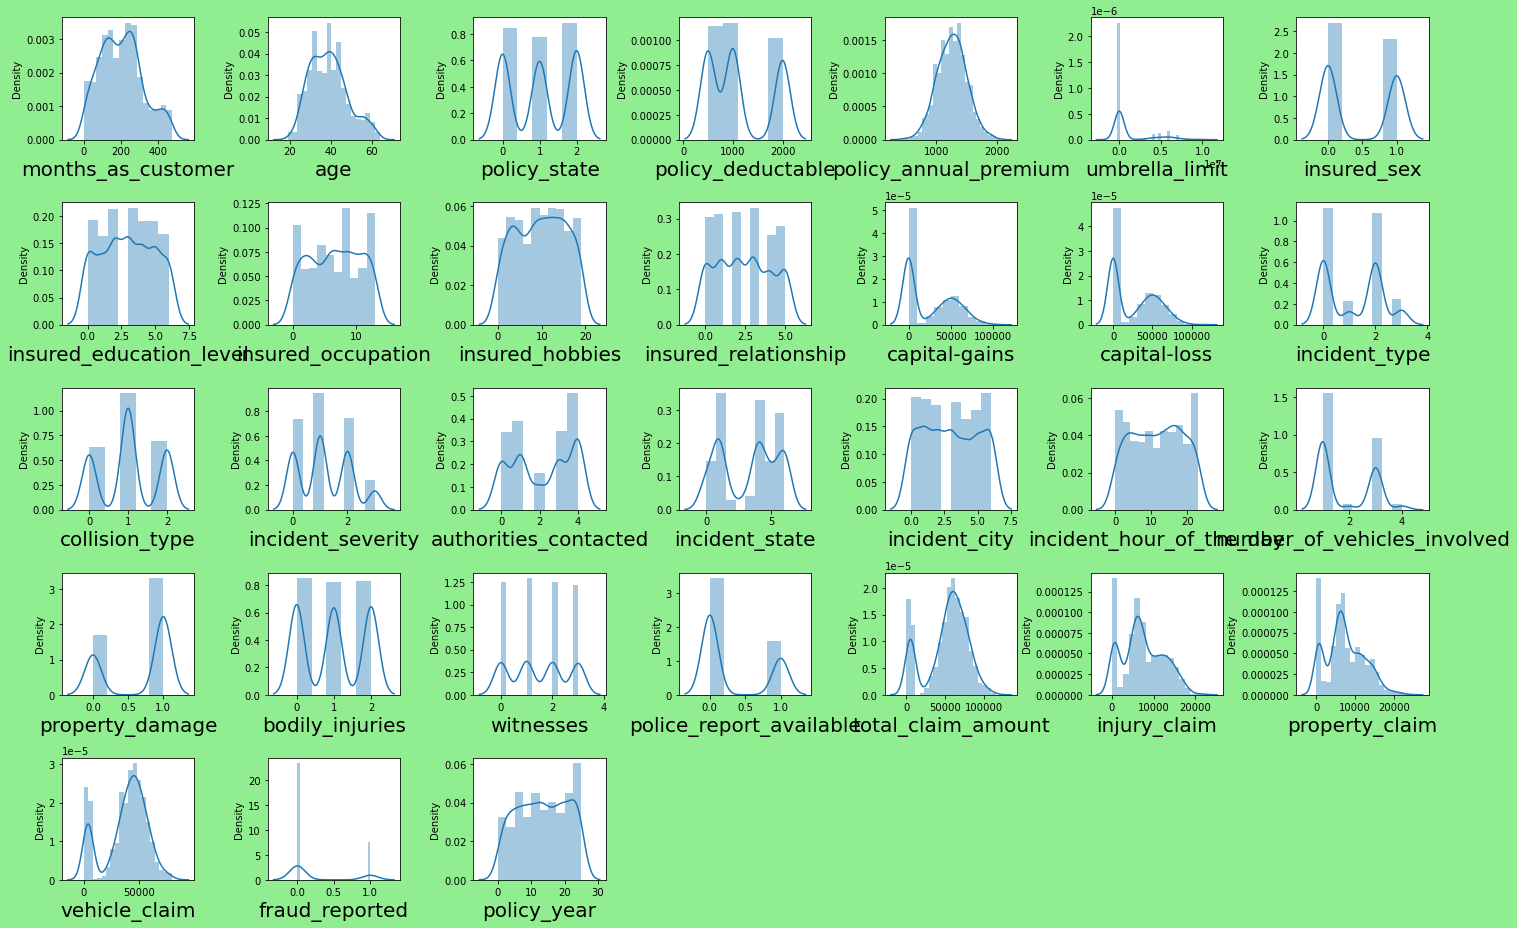

In [78]:
plt.figure(figsize=(20,15),facecolor='lightgreen')
plot_number=1

for column in df:
    if plot_number<=42: 
        ax=plt.subplot(6,7,plot_number)
        sns.distplot(df[column]) 
        plt.xlabel(column,fontsize=20)
     
    plot_number +=1
    
    
plt.tight_layout()

In [79]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                   0.391472
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage               -0.685977
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.802728


__we need to remove skewness in the columns umbrella limit, total_Claim amount,vehicle claim__

## Using Z Score to remove outliers

In [80]:
from scipy.stats import zscore
z=abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
df_new.shape

(980, 31)

In [81]:
dataloss=(1-(980/1000))
print("Dataloss",dataloss)

Dataloss 0.020000000000000018


Only 2% data lost so we can proceed further.<br>
__Checking skewness again__

In [82]:
df_new.skew()

months_as_customer             0.362608
age                            0.475385
policy_state                  -0.038157
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                   0.376884
incident_type                  0.090563
collision_type                -0.032778
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
property_damage               -0.691993
bodily_injuries                0.003757
witnesses                      0.026211
police_report_available        0.796221


still there is skewness, lets remove it



1.5847791899208252

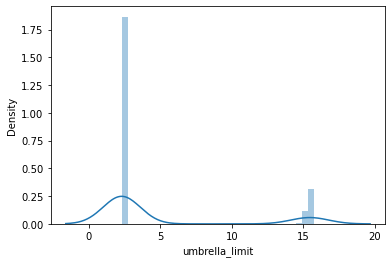

In [83]:
df_new['umbrella_limit']=np.log(df_new['umbrella_limit']+10)
sns.distplot(df_new['umbrella_limit'])
df_new['umbrella_limit'].skew()

skewness reduced to 1.5 from 1.8



0.5366256297467658

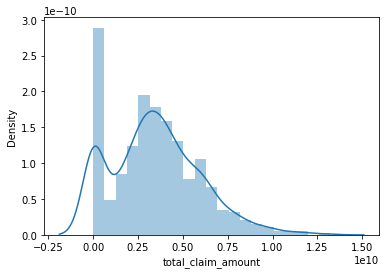

In [84]:
df_new['total_claim_amount']=np.square(df_new['total_claim_amount'])
sns.distplot(df_new['total_claim_amount'])
df_new['total_claim_amount'].skew()

0.48271142893742414

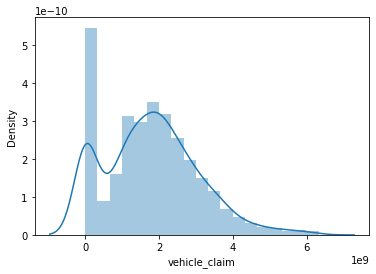

In [85]:
df_new['vehicle_claim']=np.square(df_new['vehicle_claim']+1)
sns.distplot(df_new['vehicle_claim'])
df_new['vehicle_claim'].skew()

Again Checking for null values after applying np.log method

In [86]:
df_new.isna().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 1
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
fraud_reported                 0
policy_yea

- umbrella_limit colmns has single null value so we need to fill this as well.

In [87]:
df_new['umbrella_limit'].describe()

count    979.000000
mean       4.798324
std        5.157124
min        2.302585
25%        2.302585
50%        2.302585
75%        2.302585
max       15.761422
Name: umbrella_limit, dtype: float64

In [88]:
df_new['umbrella_limit']=df_new['umbrella_limit'].fillna(df['umbrella_limit'].median())

In [89]:
df_new['umbrella_limit'].isna().sum()

0

We got rid of the null value and now we can proceed further

## Correlation using a Heatmap

In [90]:
df_new.corr()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,policy_year
months_as_customer,1.000000,0.922960,-0.007183,0.031041,-0.003814,0.004879,0.059644,-0.000731,0.006925,-0.089358,...,-0.005308,-0.007674,0.063574,-0.017200,0.064724,0.065062,0.036660,0.058769,0.021285,0.041914
age,0.922960,1.000000,-0.020012,0.032036,0.005330,-0.003607,0.073790,0.001647,0.014798,-0.079099,...,-0.004176,-0.012254,0.056360,-0.018135,0.073184,0.077149,0.062375,0.058556,0.013279,0.031709
policy_state,-0.007183,-0.020012,1.000000,0.017612,0.015089,-0.006661,-0.018002,-0.027173,-0.025357,-0.039501,...,-0.037097,0.012097,0.025838,0.065316,-0.017674,-0.048188,-0.006420,-0.005330,0.034587,0.003045
policy_deductable,0.031041,0.032036,0.017612,1.000000,-0.008300,0.001576,-0.006977,0.014101,-0.053888,-0.001923,...,0.009863,-0.037263,0.071709,0.036275,0.027892,0.038459,0.071031,-0.001318,0.015774,0.054041
policy_annual_premium,-0.003814,0.005330,0.015089,-0.008300,1.000000,-0.006864,0.041312,-0.021400,0.027827,-0.014226,...,-0.001288,0.027837,0.003433,0.032413,-0.010994,-0.024119,-0.014073,0.003719,-0.012686,-0.002433
umbrella_limit,0.004879,-0.003607,-0.006661,0.001576,-0.006864,1.000000,0.017713,-0.023327,0.007702,-0.029609,...,-0.046168,0.064123,-0.005523,-0.047380,-0.041108,-0.041760,-0.015001,-0.043424,0.050849,-0.059303
insured_sex,0.059644,0.073790,-0.018002,-0.006977,0.041312,0.017713,1.000000,0.010068,-0.007440,-0.020928,...,0.011043,-0.015199,0.039343,0.014179,-0.024613,0.008472,-0.008744,-0.030630,0.020582,0.031230
insured_education_level,-0.000731,0.001647,-0.027173,0.014101,-0.021400,-0.023327,0.010068,1.000000,-0.025394,0.025229,...,-0.054688,-0.017959,0.021747,0.055785,0.077335,0.086600,0.062230,0.066616,0.013116,-0.016874
insured_occupation,0.006925,0.014798,-0.025357,-0.053888,0.027827,0.007702,-0.007440,-0.025394,1.000000,-0.010375,...,-0.046507,-0.000221,-0.016435,-0.024580,0.007796,0.024840,0.010040,0.001938,0.000277,0.026467
insured_hobbies,-0.089358,-0.079099,-0.039501,-0.001923,-0.014226,-0.029609,-0.020928,0.025229,-0.010375,1.000000,...,0.014602,0.026890,-0.036967,-0.034683,0.017893,0.031374,0.010616,0.000657,-0.048181,0.020370


## Correlation Bar Plot comparing features with our label

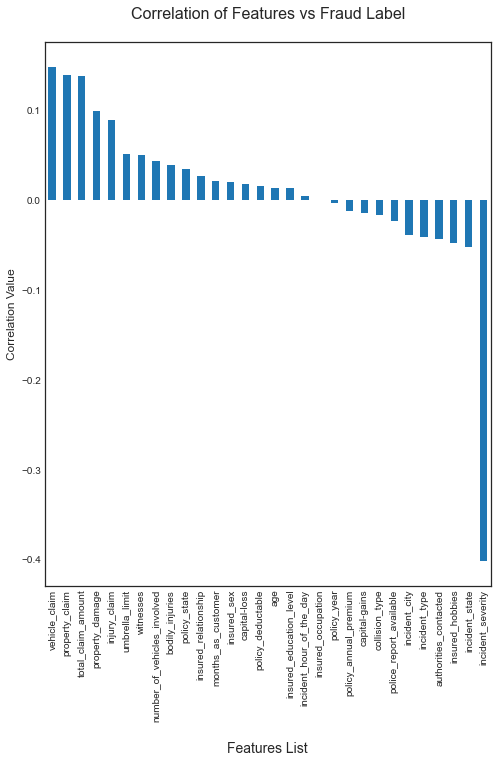

In [93]:
plt.style.use('seaborn-white')

df_corr = df_new.corr()
plt.figure(figsize=(8,10))
df_corr['fraud_reported'].sort_values(ascending=False).drop('fraud_reported').plot.bar()
plt.title("Correlation of Features vs Fraud Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

Here Bar plot is giving  us a clearer picture on positive and negative correlation columns we have generated this bar plot and we see that more than half the feature columns are positively correlated with our target label while all the remaining features are negatively correlated with our label column.

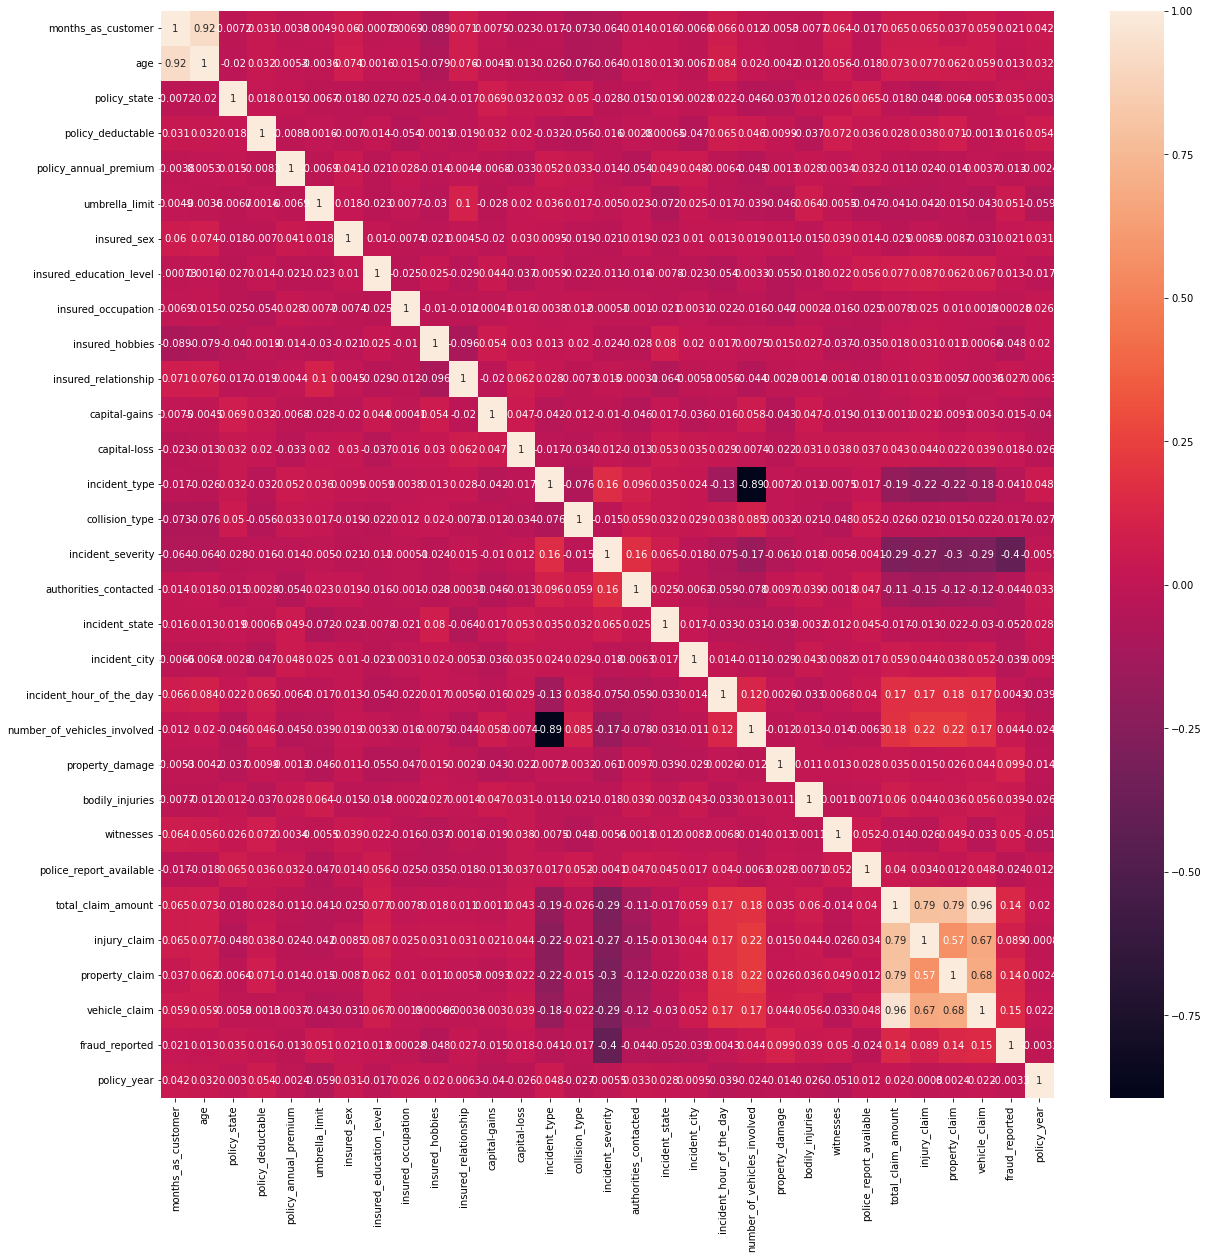

In [91]:
plt.figure(figsize=(20,20))
sns.heatmap(df_new.corr(),annot=True)
plt.show()

__observations__:

- Months_as_customer and age are correlated,we can drop column age  ,incident severity and authorities contacted are corlatred, we will drop authorities as it has less impact on the fraud.

- finding total claim is correlated to injury, vehicle and property claims, so we will drop those three columns

__CHecking vif , so that we can drop columns with higher vif values__


In [92]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [93]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=df_new.columns
    vif['vif factor']=[variance_inflation_factor(df_new.values,i) for i in range(x.shape[1])]
    return(vif)

In [94]:
calc_vif(df_new)


,variables,vif factor
0,months_as_customer,23.389039
1,age,95.902420
2,policy_state,2.546942
3,policy_deductable,4.583226
4,policy_annual_premium,24.829123
5,umbrella_limit,1.919520
6,insured_sex,1.913671
7,insured_education_level,3.346181
8,insured_occupation,3.720957
9,insured_hobbies,4.042700


In [95]:
df_new=df_new.drop(['age','injury_claim','property_claim','vehicle_claim','authorities_contacted','insured_occupation'],axis=1)


In [96]:
df_new.shape


(980, 25)

In [97]:
calc_vif(df_new)


,variables,vif factor
0,months_as_customer,4.196417
1,policy_state,2.530261
2,policy_deductable,4.501046
3,policy_annual_premium,21.638822
4,umbrella_limit,1.911316
5,insured_sex,1.903108
6,insured_education_level,3.298404
7,insured_hobbies,3.988172
8,insured_relationship,3.103697
9,capital-gains,1.865415


In [98]:
df_new=df_new.drop(['incident_type','policy_deductable','insured_relationship','capital-gains','capital-loss'],axis=1)


In [100]:
df_new.shape



(980, 20)

__Dataset is cleaned and preprocesed now, we can send the dataset for model building__

##  Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [101]:
X=df_new.drop('fraud_reported',axis=1)
Y=df_new['fraud_reported']

In [102]:
X.shape

(980, 19)

## Scaling the features

In [103]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
print(X_scaled.shape)

(980, 19)


### Resolving the class imbalance issue in label column

In [104]:
print(Y.shape)
Y.value_counts()

(980,)


0    740
1    240
Name: fraud_reported, dtype: int64

In [106]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
X,Y=smt.fit_resample(X,Y)

In [107]:
print(Y.shape)
Y.value_counts()

(1480,)


1    740
0    740
Name: fraud_reported, dtype: int64

In [108]:
X.shape

(1480, 19)

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split

lo=LogisticRegression()
rs=0
acsc=0

for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=i)
    lo.fit(x_train,y_train)
    pred=lo.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>acsc:
        acsc=acc
        rs=i
print(f'Best score:{acsc}\n random state: {rs}')

Best score:0.847972972972973
 random state: 86


### Creating the training and testing data sets

In [160]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=80)


In [165]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import cross_val_score

## Machine Learning Model for Classification with Evaluation Metrics

In [183]:
# Classification Model Function

def classify(model, X_scaled, Y):
    x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=80)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting Y_test
    pred = model.predict(x_test)
    
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    #confusion Matrix
    print("Confusion Matrix\n",confusion_matrix(y_test,pred))

    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X_scaled, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

## Logistic Regression

In [184]:
clf=LogisticRegression()
classify(clf,X_scaled,Y)

Accuracy Score: 79.3918918918919
Confusion Matrix
 [[118  29]
 [ 32 117]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.79       147
           1       0.80      0.79      0.79       149

    accuracy                           0.79       296
   macro avg       0.79      0.79      0.79       296
weighted avg       0.79      0.79      0.79       296

Cross Validation Score: 76.62162162162163

Accuracy Score - Cross Validation Score is 2.7702702702702737


## DecisionTreeClassifier

In [185]:
clf=DecisionTreeClassifier()
classify(clf,X_scaled,Y)

Accuracy Score: 79.05405405405406
Confusion Matrix
 [[111  36]
 [ 26 123]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.76      0.78       147
           1       0.77      0.83      0.80       149

    accuracy                           0.79       296
   macro avg       0.79      0.79      0.79       296
weighted avg       0.79      0.79      0.79       296

Cross Validation Score: 79.72972972972974

Accuracy Score - Cross Validation Score is -0.6756756756756772


## RandomForestClassifier

In [205]:
clf=RandomForestClassifier()
classify(clf,X_scaled,Y)

Accuracy Score: 88.17567567567568
Confusion Matrix
 [[129  18]
 [ 17 132]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       147
           1       0.88      0.89      0.88       149

    accuracy                           0.88       296
   macro avg       0.88      0.88      0.88       296
weighted avg       0.88      0.88      0.88       296

Cross Validation Score: 85.20270270270271

Accuracy Score - Cross Validation Score is 2.9729729729729684


## SVC

In [189]:
clf= SVC()
classify(clf,X_scaled,Y)

Accuracy Score: 85.8108108108108
Confusion Matrix
 [[127  20]
 [ 22 127]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86       147
           1       0.86      0.85      0.86       149

    accuracy                           0.86       296
   macro avg       0.86      0.86      0.86       296
weighted avg       0.86      0.86      0.86       296

Cross Validation Score: 82.56756756756758

Accuracy Score - Cross Validation Score is 3.243243243243228


## GradientBoostingClassifier


In [190]:
clf=GradientBoostingClassifier()
classify(clf,X_scaled,Y)

Accuracy Score: 88.17567567567568
Confusion Matrix
 [[127  20]
 [ 15 134]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88       147
           1       0.87      0.90      0.88       149

    accuracy                           0.88       296
   macro avg       0.88      0.88      0.88       296
weighted avg       0.88      0.88      0.88       296

Cross Validation Score: 84.25675675675676

Accuracy Score - Cross Validation Score is 3.9189189189189193


## KNeighborsClassifier

In [191]:
clf=KNeighborsClassifier()
classify(clf,X_scaled,Y)

Accuracy Score: 81.08108108108108
Confusion Matrix
 [[ 98  49]
 [  7 142]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.67      0.78       147
           1       0.74      0.95      0.84       149

    accuracy                           0.81       296
   macro avg       0.84      0.81      0.81       296
weighted avg       0.84      0.81      0.81       296

Cross Validation Score: 74.32432432432434

Accuracy Score - Cross Validation Score is 6.756756756756744


## XGB

In [192]:
import xgboost as xgb

In [193]:
clf=xgb.XGBClassifier()

classify(clf,X_scaled,Y)

Accuracy Score: 89.52702702702703
Confusion Matrix
 [[124  23]
 [  8 141]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.84      0.89       147
           1       0.86      0.95      0.90       149

    accuracy                           0.90       296
   macro avg       0.90      0.89      0.89       296
weighted avg       0.90      0.90      0.89       296

Cross Validation Score: 86.35135135135134

Accuracy Score - Cross Validation Score is 3.1756756756756914


## AdaBoostClassifier

In [194]:
clf=AdaBoostClassifier()

classify(clf,X_scaled,Y)

Accuracy Score: 86.48648648648648
Confusion Matrix
 [[133  14]
 [ 26 123]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       147
           1       0.90      0.83      0.86       149

    accuracy                           0.86       296
   macro avg       0.87      0.87      0.86       296
weighted avg       0.87      0.86      0.86       296

Cross Validation Score: 82.97297297297298

Accuracy Score - Cross Validation Score is 3.5135135135135016


__On the basis of f1 score(0.89) score and difference between Accuracy Score - Cross Validation Score (2.97) and less faults by checking confusion matrix. I am Selecting RandomForestClassifier model__

## RandomForest without Hypertuning parameter

In [261]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predn=rf.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,predn))
print("Confusion Matrix\n",confusion_matrix(y_test,predn))
print("Classification Report:\n",classification_report(y_test,predn))

Accuracy Score: 0.902027027027027
Confusion Matrix
 [[130  17]
 [ 12 137]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       147
           1       0.89      0.92      0.90       149

    accuracy                           0.90       296
   macro avg       0.90      0.90      0.90       296
weighted avg       0.90      0.90      0.90       296



## Hypertuning the Parameters for RandomForestClassifier

In [209]:
par={'n_estimators':range(100,500,100),'criterion':['gini','entropy'],'max_depth':range(0,10,5),'min_samples_split':range(2,20,4),
     'min_samples_leaf':range(1,5),'max_features':['auto']}

grid=GridSearchCV(RandomForestClassifier(),param_grid=par,verbose=2,n_jobs=1)
grid.fit(x_train,y_train)
print("Best score:",grid.best_score_)
print("Best estimator:",grid.best_estimator_)
print("Best parameters:",grid.best_params_)


Fitting 5 folds for each of 320 candidates, totalling 1600 fits
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time

[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_featur

[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=300; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto

[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=18, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=18, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=18, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=18, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=18, n_estimators=300; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=18, n_estimators=300; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=18, n_estimators=300; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_featur

[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_featur

[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.2s
[CV] END criterion=gini, max_depth=0, max_features=auto

[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=300; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=300; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=300; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=300; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=300; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=400; total time=   0.2s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=400; total time=   0.2s
[CV] END criterion=gini, max_depth=0, max_featur

[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   0.8s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   0.9s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   0.9s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   0.8s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   1.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   1.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   1.3s
[CV] END criterion=gini, max_depth=5, max_features=auto

[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=18, n_estimators=300; total time=   0.8s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=18, n_estimators=300; total time=   0.8s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=18, n_estimators=300; total time=   0.8s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=18, n_estimators=400; total time=   1.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=18, n_estimators=400; total time=   1.3s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=18, n_estimators=400; total time=   1.9s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=18, n_estimators=400; total time=   2.1s
[CV] END criterion=gini, max_depth=5, max_featur

[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   1.3s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   1.3s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   1.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   1.4s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   1.6s
[CV] END criterion=gini, max_depth=5, max_featur

[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   1.3s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   1.4s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   1.6s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   1.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   1.3s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=auto

[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=14, n_estimators=400; total time=   1.5s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=14, n_estimators=400; total time=   1.3s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=14, n_estimators=400; total time=   1.3s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=14, n_estimators=400; total time=   1.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=14, n_estimators=400; total time=   1.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=18, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=18, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_featur

[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=400; total time=   2.5s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=400; total time=   1.9s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=400; total time=   1.8s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=400; total time=   1.8s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=a

[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=18, n_estimators=400; total time=   1.3s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=18, n_estimators=400; total time=   1.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=18, n_estimators=400; total time=   1.1s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0,

[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.1s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy,

[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_de

[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=400; total time=   0.2s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=400; total time=   0.2s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=400; total time=   0.2s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=18, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=18, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=18, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=18, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy,

[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=400; total time=   0.2s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=400; total time=   0.2s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=400; total time=   0.2s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, ma

[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=3, min_samples_split=18, n_estimators=400; total time=   0.1s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=3, min_samples_split=18, n_estimators=400; total time=   0.1s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=3, min_samples_split=18, n_estimators=400; total time=   0.1s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=3, min_samples_split=18, n_estimators=400; total time=   0.1s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, ma

[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.1s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.1s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.1s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.1s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy,

[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.6s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.4s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.4s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.7s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_de

[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=400; total time=   2.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=400; total time=   2.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=400; total time=   3.1s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=400; total time=   1.9s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=18, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=18, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=18, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy,

[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=400; total time=   1.6s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=400; total time=   1.7s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=400; total time=   1.7s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=400; total time=   1.6s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max

[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=18, n_estimators=400; total time=   1.6s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=18, n_estimators=400; total time=   1.5s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=18, n_estimators=400; total time=   1.6s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=18, n_estimators=400; total time=   1.5s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=18, n_estimators=400; total time=   1.7s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=400; total time=   1.7s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=400; total time=   1.8s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=400; total time=   2.1s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=400; total time=   2.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=400; total time=   2.3s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=14, n_estimators=100; total time=   0.4s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=14, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy,

[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.7s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.6s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.6s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.6s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.7s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.4s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_de

[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=400; total time=   2.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=400; total time=   2.3s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=400; total time=   2.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=400; total time=   1.7s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=400; total time=   1.8s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=18, n_estimators=100; total time=   0.4s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=18, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy,

In [210]:
print("Best score:",grid.best_score_)
print("Best estimator:",grid.best_estimator_)
print("Best parameters:",grid.best_params_)

Best score: 0.8209504398197811
Best estimator: RandomForestClassifier(max_depth=5, min_samples_leaf=2, n_estimators=300)
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [254]:
rfc=RandomForestClassifier(criterion='gini', max_depth=100, min_samples_leaf=3,
                       min_samples_split=5,max_features='auto',n_estimators=100,random_state=400)
rfc.fit(x_train,y_train)
predc=rf.predict(x_test)
print('accuracy:',accuracy_score(y_test,predc))
print('confusion matrix:\n',confusion_matrix(y_test,predc))
print('\nclassification report:\n',classification_report(y_test,predc))

accuracy: 0.8986486486486487
confusion matrix:
 [[132  15]
 [ 15 134]]

classification report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       147
           1       0.90      0.90      0.90       149

    accuracy                           0.90       296
   macro avg       0.90      0.90      0.90       296
weighted avg       0.90      0.90      0.90       296



__Even Afetr Hypertuning Accuracy is not incaresing from 0.898 so Selecting the model which is by deafult giving the accuracy of 0.902__

__Comaring Actual and Predicted values__

In [255]:
results=pd.DataFrame({})
results['Actual']=y_test
results['Predicted']=predn
results

,Actual,Predicted
1426,1,1
1230,1,1
261,0,0
461,0,0
1324,1,1
...,...,...
188,0,0
318,0,0
1000,1,1
725,0,0


## AUC - ROC curve

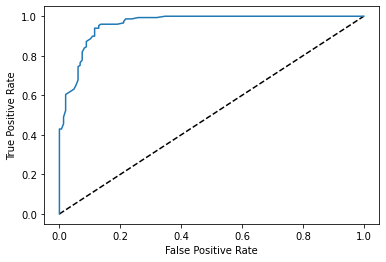

Score: 0.9019084143724604


In [262]:
from sklearn.metrics import roc_auc_score
#Predicting the probability of having 1 in the x-test
y_pred_prob=rf.predict_proba(x_test)[:,1]

from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
auc_score=roc_auc_score(y_test,rf.predict(x_test))
print('Score:',auc_score)

## Confusion Matrix

In [263]:
from sklearn import metrics


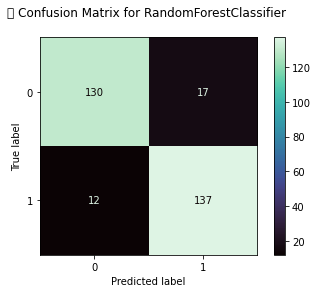

In [264]:
class_names = df_new.columns
metrics.plot_confusion_matrix(rf, x_test, y_test, cmap='mako')
plt.title('\t Confusion Matrix for RandomForestClassifier \n')
plt.show()

With the help of above confusion matrix I am able to understand the number of times I got the correct outputs and the number of times my model missed to provide the correct prediction (depicting in the black boxes)

## Saving the model

In [109]:
import pickle

In [266]:
filename='Insurance-claim-fraud.pkl'


In [267]:
pickle.dump(rf,open(filename,'wb'))


In [268]:
#conclusion
loaded_model=pickle.load(open('Insurance-claim-fraud.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

90.2027027027027


In [269]:
#Conslusion
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=['Predcited','Orignal'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,286,287,288,289,290,291,292,293,294,295
Predcited,1,1,0,0,0,1,1,0,1,1,...,1,0,0,0,1,0,0,1,0,0
Orignal,1,1,0,0,0,1,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0


## Steps: I Followed in the above Dataset.
- imported the required libraries

- loaded the dataset and checked for shape,datatype information, columns and checked for null /missing value(if any) and took the neccessary step

- Checked for unique values count and plot a bar of it(count plot)

- plotted count,boxplot and pie for more detailed EDA

- Described the dataset using .describe() method and wrote down the observation for min, max, mean ,std and skewness.

- Visulise the skewness using distplot boxplot techniques after cheking it using.skew() method.

- Encoded categorical columns into numerical /int datatype

- Used zscore() method to remove outliers and again checked for skewness and found skewness in dataset so used np.log() method and again chekd for skewness .

- Checked for Multicoliearity and cooreation using .corr() method and heatmap plot and dropped the highly correlated fetures( if any)

Plotted bar plot to undersatnd the positive and negative related fetaures to target

- Split the dataset into features and label and applying transormation on feature using StandardScaler method.

- Found the best random_state and wrote down single function for mulitple model evaluation.

- Evaluate the different models based on score, f1score

- Calculated CV score and selected the best model which had least difference between accuracy and CV score(RandomForestClassifier).

- Hypertuned the parameter using GridsearchCV and again calculated the scores and but  the accuracy score saved the modelwas not increasing with hypertuned parameter(RandomForestClassifier)(from 0.901 to 0.898) , so saved the model without hyertuning the model.


- Plotted AUC ROC curve

- printed confusion Matrix

- Saved the model using pickle library

- Compared the predicted and Original values